## Kernelized Perceptrons

In [1]:
%matplotlib inline
import numpy as np
from numpy import zeros, ones, shape, dot, multiply
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
X = []
y = []
with open("data1.txt") as f:
    for line in f:
        l = line.split();
        X.append([1, int(l[0]), int(l[1])])
        y.append(int(l[2]))
X = np.array(X)
y = np.array(y)

### Visualizing input

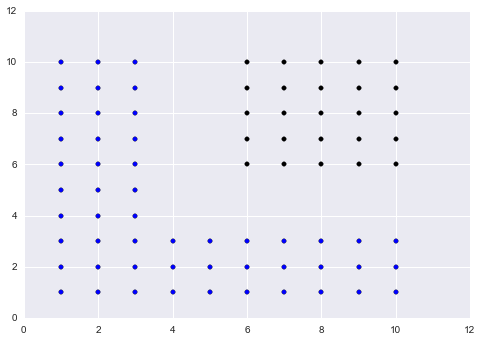

In [4]:
def displayData(X,y):
    plt.scatter(X[y==1,1],X[y==1,2], )
    plt.scatter(X[y!=1,1],X[y!=1,2], c='black')
displayData(X,y)

#### Defining Quadratic Kernel Algorithm

In [18]:
def getQuadraticKernelWeights(X,Y,T):
    # weights stored as dictionary of indices and their corresp. alpha values
    w = defaultdict(int)
    for k in range(T):
        changed = False
        for i in range (len(X)):
            sum = 0
            for key in w:
                sum += Y[key]*w[key]*(1+dot(X[i], X[key]))**2
            if sum*Y[i] <= 0:
                changed = True
                w[i] += 1
        if not changed:
            break
    return w

In [19]:
w = getQuadraticKernelWeights(X,y,50)

In [20]:
def predict(X_train,Y_train,w,X_test):
    pred = []
    for i in range (len(X_test)):
        sum = 0
        for key in w:
            sum += Y_train[key]*w[key]*(1+dot(X_train[key], X_test[i]))**2
        pred.append(1 if sum > 0 else -1)
    return np.array(pred)

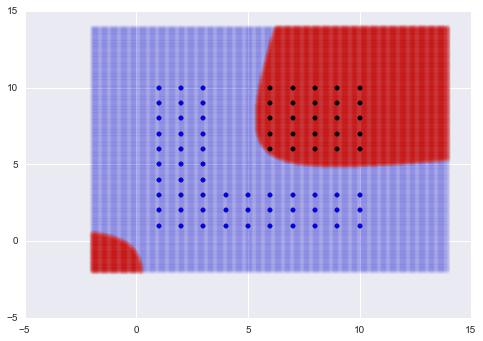

In [22]:
X_test = np.array([[1,i*0.05,j*0.05] for j in range(-40,280) for i in range(-40,280)])
y_test = predict(X,y,w,X_test)
plt.scatter(X_test[y_test==1,1],X_test[y_test==1,2], c='b',alpha=.02)
plt.scatter(X_test[y_test!=1,1],X_test[y_test!=1,2], c='r',alpha=.07)
displayData(X,y)


#### Defining RBF Kernel

In [5]:
def getRBFWeigts(X,Y,T,sigma):
    # weights stored as dictionary of indices and their corresp. alpha values
    w = defaultdict(int)
    for k in range(T):
        changed = False
        for i in range (len(X)):
            sum = 0
            for key in w:
                sum += Y[key]*w[key]*sim(X[i], X[key],sigma)
            if sum*Y[i]<0 or Y[i]==-1 and sum==0:
                changed = True
                w[i] += 1
        if not changed:
            print k
            break
    return w

In [6]:
def sim(x1,x2,sigma):
    return np.exp(-dot(x1-x2,x1-x2)/2/sigma/sigma)

In [7]:
def predictRBF(X_train,Y_train,w,X_test,sigma):
    pred = []
    for i in range (len(X_test)):
        sum = 0
        for key in w:
            sum += Y_train[key]*w[key]*sim(X_test[i], X_train[key],sigma)
        pred.append(1 if sum >= 0 else -1)
    return np.array(pred)

### Plot with varying sigma values

In [8]:
def generateRBFBoundary(X, y, T, sigma):
    w = getRBFWeigts(X,y,T,sigma)
    X_test = np.array([[1,i*0.1,j*0.1] for j in range(-20,140) for i in range(-20,140)])
    y_test = predictRBF(X,y,w,X_test,sigma)
    plt.scatter(X_test[y_test==1,1],X_test[y_test==1,2], c='b',alpha=.02)
    plt.scatter(X_test[y_test!=1,1],X_test[y_test!=1,2], c='r',alpha=.07)
    displayData(X,y)

1


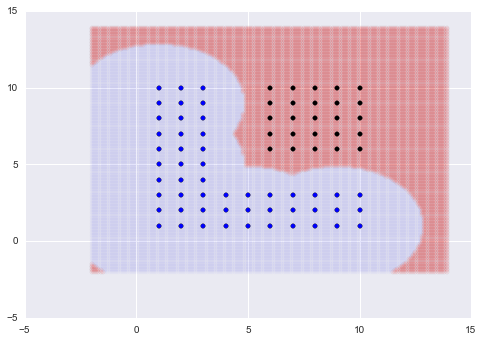

In [103]:
generateRBFBoundary(X,y,10,0.1)

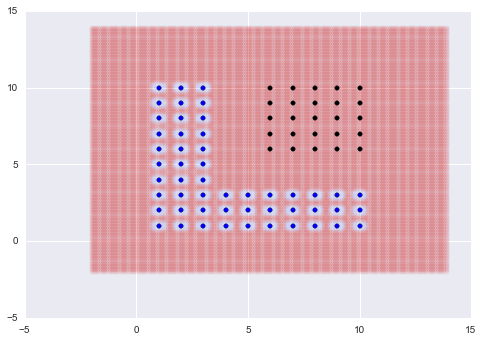

In [84]:
generateRBFBoundary(X,y,0.01)

2


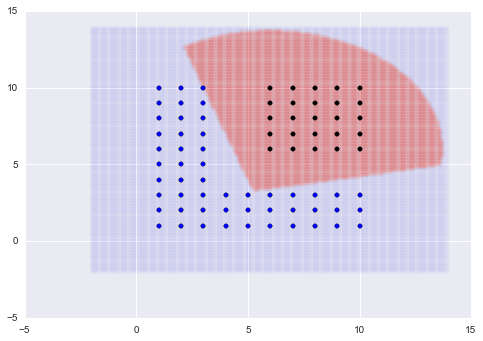

In [114]:
generateRBFBoundary(X,y,20, 0.2)

1


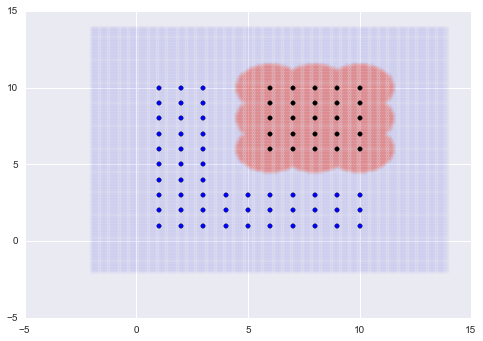

In [121]:
generateRBFBoundary(X,y,20,0.04)

1


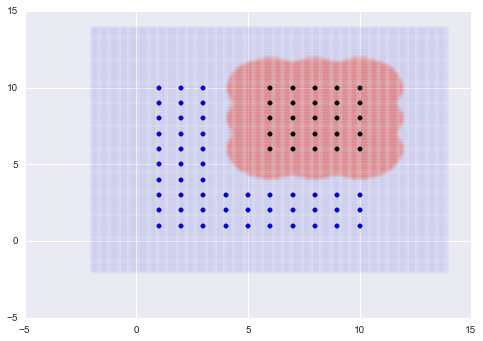

In [119]:
generateRBFBoundary(X,y,20,0.05)

1


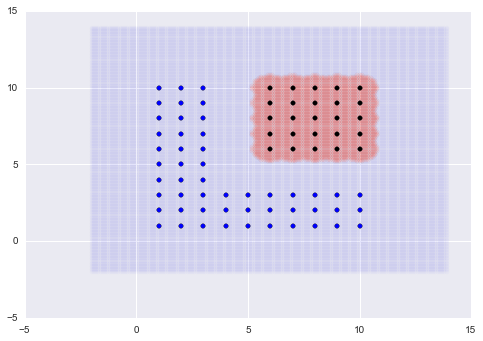

In [122]:
generateRBFBoundary(X,y,20,0.021)

1


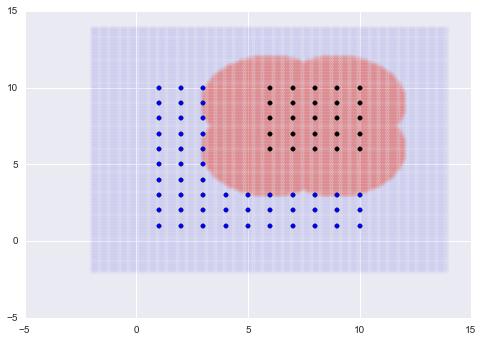

In [120]:
generateRBFBoundary(X,y,20,0.08)

## Dataset B

In [9]:
X = []
y = []
with open("data2.txt") as f:
    for line in f:
        l = line.split();
        X.append([1, int(l[0]), int(l[1])])
        y.append(int(l[2]))
X = np.array(X)
y = np.array(y)

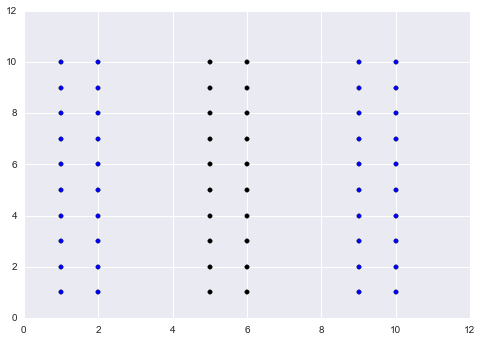

In [10]:
displayData(X,y)

In [21]:
w = getQuadraticKernelWeights(X,y,1000)

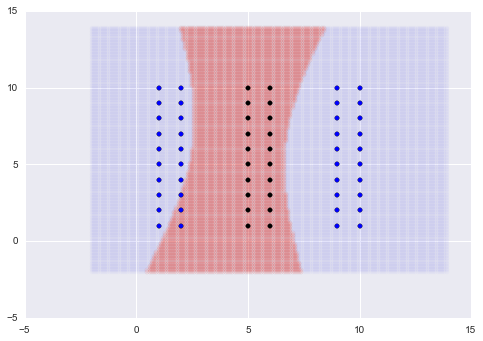

In [130]:
X_test = np.array([[1,i*0.1,j*0.1] for j in range(-20,140) for i in range(-20,140)])
y_test = predict(X,y,w,X_test)
plt.scatter(X_test[y_test==1,1],X_test[y_test==1,2], c='b',alpha=.02)
plt.scatter(X_test[y_test!=1,1],X_test[y_test!=1,2], c='r',alpha=.07)
displayData(X,y)

In [ ]:
generateRBFBoundary(X,y,20,0.05)